In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gsw as sw
import scipy.signal as signal

In [2]:
# import the Tokyo cruise data
inputdata = '/Users/sclayton/Documents/seaflow/data/tokyo_underway/Tokyo_underway_chl1.csv'
data = pd.read_csv(inputdata)
print data.columns


Index([u'date.1', u'time.1', u'long.dc', u'lat.dc', u'T1', u'S', u'chl'], dtype='object')


In [4]:
x = (data['long.dc']).values # longitude
y = (data['lat.dc']).values # latitude

# convert all longitude to longitude east
x[x<0]= 360+x[x<0];
xew = x
xew[xew>180] = xew[xew>180]-360

distance = sw.distance(xew,y,0)[0]
track = np.cumsum(distance)
track = np.insert(track, 0, 0)

In [13]:
# calculate density
T = data['T1'].values
S = data['S'].values
D = sw.rho(S,T,0)
C = data['chl'].values
D[D>1040]=np.nan
D[D<1020]=np.nan

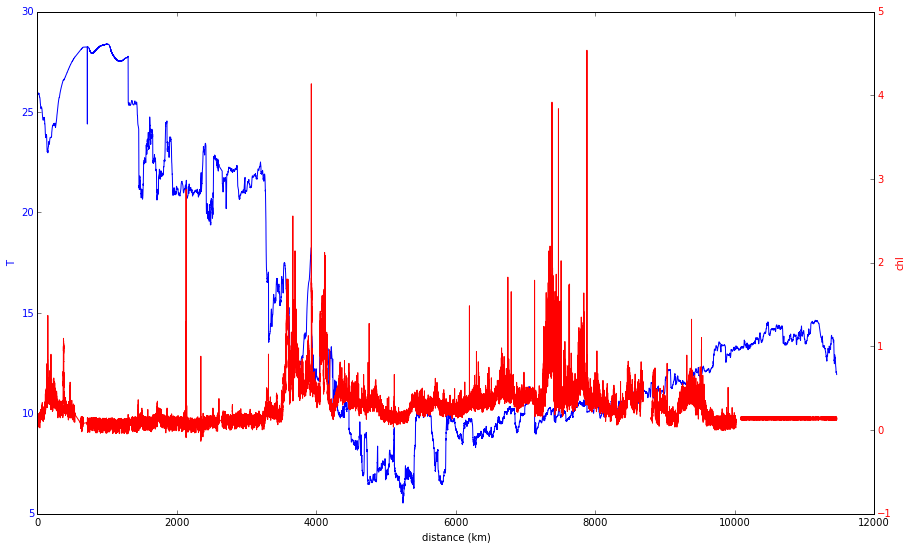

In [23]:
# interpolate the data onto a regular 0.1 km grid
smoothdist = 1
xsmooth = np.arange(0,np.floor(np.max(track)), smoothdist)
Tsmooth = np.interp(xsmooth,track,T)

csmoothdist = 50
xcsmooth = np.arange(0,np.floor(np.max(track)),csmoothdist)
Csmooth = np.interp(xcsmooth,track, C)

fig2, ax1 = plt.subplots(figsize=(15,9))
ax1.plot(xsmooth/1000, Tsmooth,'b-')
ax1.set_xlabel('distance (km)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(track/1000, C, 'r-')
ax2.set_ylabel('chl', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()

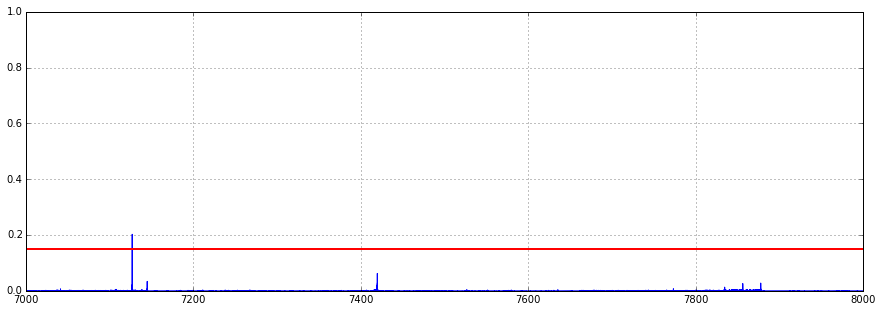

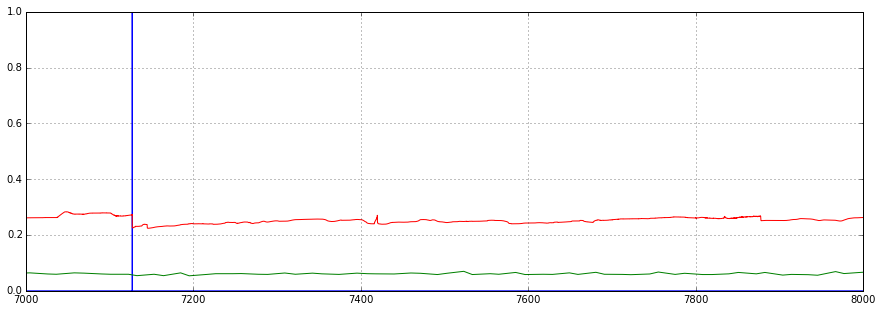

In [28]:
# gradients
dD = (D[1:len(D)]-D[:len(D)-1])/distance
dS = (S[1:len(S)]-S[:len(S)-1])/distance
dT = (Tsmooth[1:len(Tsmooth)]-Tsmooth[:len(Tsmooth)-1])/smoothdist

# calculate point along track where gradient is calculated
dD_track = track[0:len(track)-1]+distance/2
dD_smooth = xsmooth[0:len(xsmooth)-1]+smoothdist/2

# look for fronts
front_param = 0.15

fig1 = plt.figure(1, figsize=(15,5))
plt.plot(dD_smooth/1000, abs(dT))
plt.axhline(y=front_param,linewidth=2, color='r')
plt.grid(True)
plt.axis([7000,8000, 0, 1])
plt.show()


front = np.zeros(len(dT))
front[(abs(dT))>front_param] = 1

fig2 = plt.figure(2, figsize=(15,5))
plt.plot(dD_smooth/1000,front,track/1000,T*0.025,'-r',track,C*0.5,'-g')
plt.axis([7000,8000, 0, 1])
plt.grid(True)
plt.show()

# how many front are there in the dataset and how wide are they?

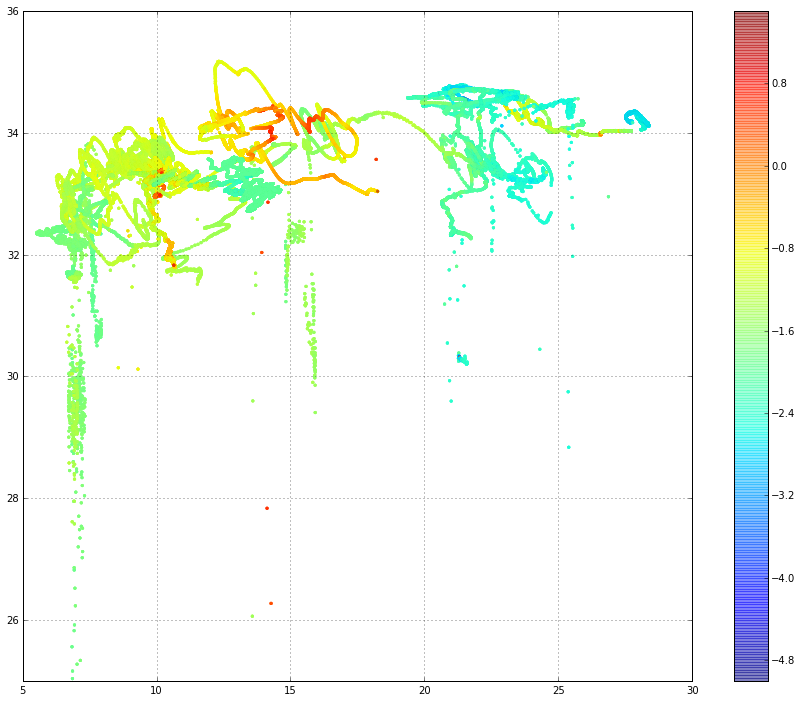

In [34]:
fig3 = plt.figure(3, figsize=(15,12))
plt.scatter(T,S,s=10,c=np.log(C),lw=0,alpha=0.5,vmin=-5,vmax=1.5)
plt.axis([5,30,25,36])
plt.grid(True)
plt.colorbar()
plt.show()

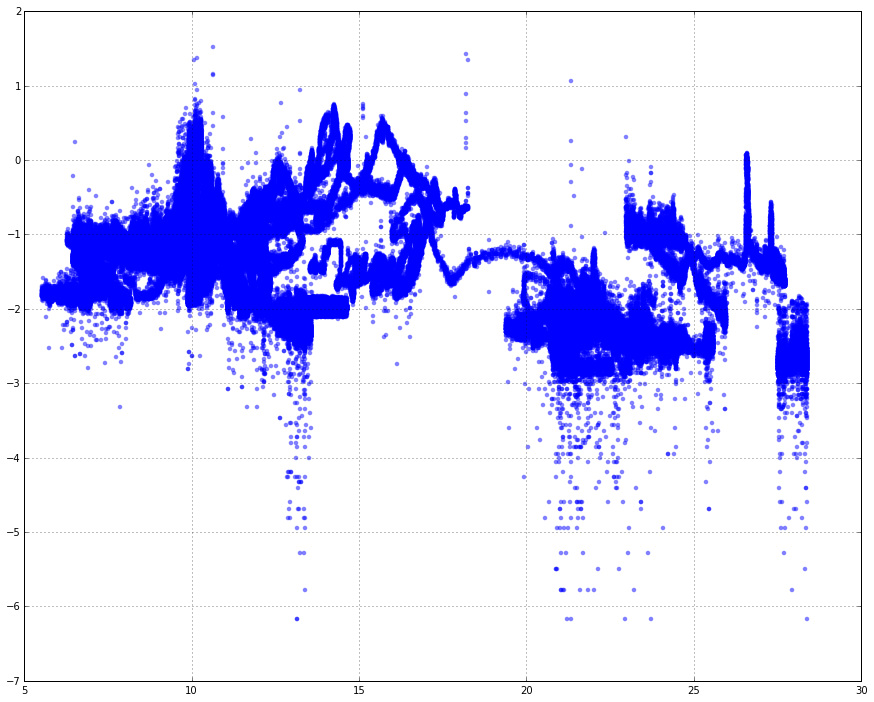

In [8]:
fig4 = plt.figure(3, figsize=(15,12))
plt.scatter(T,np.log(C),lw=0,alpha=0.5)
plt.axis([5,30,-7,2])
plt.grid(True)
plt.show()